# Explore

In [24]:
%cd ../..

/


In [25]:
from src.data.files import Data
import pandas as pd

In [26]:
events = Data.get_events()
tel = Data.get_telemetry()

In [27]:
events.head()

,datetime,machineID,failure_comp1,failure_comp2,failure_comp3,failure_comp4,maint_comp1,maint_comp2,maint_comp3,maint_comp4,error1,error2,error3,error4,error5,failure,maint,error,anomaly
0,2015-01-01 06:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
1,2015-01-01 07:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
2,2015-01-01 08:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
3,2015-01-01 09:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
4,2015-01-01 10:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False


## Timeseries Plots

In [74]:
events["datetime"] = pd.to_datetime(events['datetime'])
tel["datetime"] = pd.to_datetime(tel['datetime'])

In [75]:
START_T = "2015-1-1"
END_T = "2015-1-5"
tel_mask = pandas_mask(tel, START_T, END_T)
events_mask = pandas_mask(events, START_T, END_T)

In [76]:
machine_id = 94
sample_e = events.loc[events_mask]
sample_t = tel.loc[events_mask]
failures = sample_e.loc[sample_e['failure'] == True]

In [77]:
sample_e

,datetime,machineID,failure_comp1,failure_comp2,failure_comp3,failure_comp4,maint_comp1,maint_comp2,maint_comp3,maint_comp4,error1,error2,error3,error4,error5,failure,maint,error,anomaly
0,2015-01-01 06:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
1,2015-01-01 07:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
2,2015-01-01 08:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
3,2015-01-01 09:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
4,2015-01-01 10:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867425,2015-01-04 20:00:00,100,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
867426,2015-01-04 21:00:00,100,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
867427,2015-01-04 22:00:00,100,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
867428,2015-01-04 23:00:00,100,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False


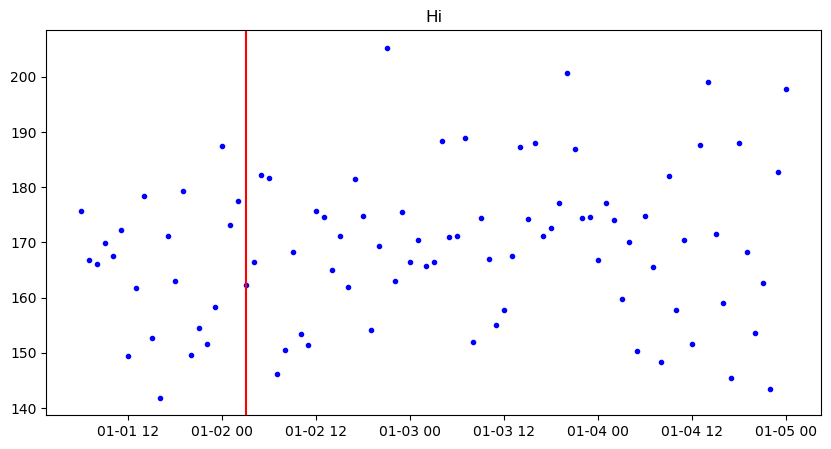

In [78]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.title("Hi")
plt.plot(sample_t["datetime"].loc[sample_t["machineID"] == machine_id], sample_t["volt"].loc[sample_t["machineID"] == machine_id], ".b")
for t in failures["datetime"].loc[failures["machineID"] == machine_id]:
    plt.axvline(t, color="r")
plt.show()